# How to Use Tensorboard with PyTorch

Displaying images and other metrics of mnist dataset on tensorboard

In [14]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

import pandas as pd
import numpy as np


import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from torch.autograd import Variable

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('runs/mnist_tboard')

import warnings
warnings.filterwarnings('ignore')

In [4]:
# train and test dataset
train_data = dsets.MNIST(root='mnist_data/', train=True,transform = transforms.ToTensor(), download=True)
test_data = dsets.MNIST(root='mnist_data/', train=False, transform = transforms.ToTensor(),download=True)

In [59]:
# train and test dataloader
batch_size = 1
train_loader = torch.utils.data.DataLoader(dataset=train_data,\
                                          batch_size=batch_size)

test_loader = torch.utils.data.DataLoader(dataset=test_data,\
                                          batch_size=batch_size)

In [60]:
# size of the data
print(train_data.train_data.size())
print(train_data.train_labels.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


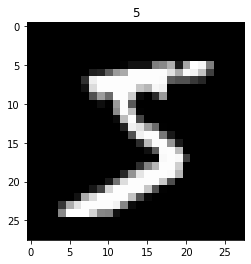

In [61]:
# plot one example
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title(f'{train_data.train_labels[0]}');

In [62]:
# sample image on tensorboard
sample = iter(train_loader)
sample_data, _ = examples.next()
img_grid = torchvision.utils.make_grid(sample_data)
writer.add_image('sample_mnist_images', img_grid)

In [63]:
# Fully connected ueral network
class MnistNet(nn.Module):
    def __init__(self):
        super(MnistNet, self).__init__()
        self.linear1 = nn.Linear(28*28, 64)
        self.linear2 = nn.Linear(64, 10)
        
    def forward(self, x):
        linear1 = F.relu(self.linear1(x))
        out = self.linear2(linear1)
        return out

In [64]:
# initialize the mode
model = MnistNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model.to(device) # change device

MnistNet(
  (linear1): Linear(in_features=784, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=10, bias=True)
)

In [65]:
# define the loss function
loss_function = nn.CrossEntropyLoss()

In [66]:
# define the optimization
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [74]:
epoch = 1
# training and testing
for epch in range(epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for step,  (x, y) in enumerate(train_loader):
        inputs, labels = x.reshape(-1, 28*28).to(device), y.to(device) # reshape
        outputs = model(inputs)

        # zero the parameter gradients
        optimizer.zero_grad()
        loss = loss_function(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        val_pred = torch.max(outputs.data, 1)
        if val_pred[1] != labels:
            # write not correct image
            imgs = torchvision.utils.make_grid(x)
            writer.add_image('MnistImages', imgs)
        running_loss += loss.item()
        if (step+1) % 10000 == 0:    # print every 10000 mini-batches
            print (f'Epoch [{epch+1}/{epoch}], Step [{step+1}/{len(train_loader)}], Loss: {loss.item():.3f}')
            running_loss = 0.0

print('Finished Training')

Epoch [1/1], Step [10000/60000], Loss: 0.0000
Epoch [1/1], Step [20000/60000], Loss: 0.0000
Epoch [1/1], Step [30000/60000], Loss: 0.0001
Epoch [1/1], Step [40000/60000], Loss: 2.0882
Epoch [1/1], Step [50000/60000], Loss: 1.3809
Epoch [1/1], Step [60000/60000], Loss: 0.0000
Finished Training


In [75]:
!tensorboard --logdir='runs/mnist_tboard/' #see the tensorboard

2022-02-17 05:18:05.071669: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.8.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C
